# Importing Necessary Libararies

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


# Loading and preprocessing data

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizing to data into 1 and 0
x_train = x_train/255
x_test = x_test/255

# One hot encoding

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 [==============================] - 7s 1us/step


# Building ANN Model

In [5]:
model = Sequential([
    Flatten(input_shape = (28,28)), # Flatten the input images to a 1D vector
    Dense(128, activation = 'relu'), # Hidden layer with 128 neurons and ReLU activation
    Dense(64, activation = 'relu'), # Hidden layer with 64 neurons and ReLU activation
    Dense(10, activation = 'softmax') # Output layer with 10 neurons (one for each digit) and softmax activation
])

# Compiling the Model

In [7]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

# Training Model 

In [8]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data = (x_test, y_test))

Epoch 1/10


1875/1875 [==============================] - 4s 2ms/step - loss: 0.2382 - accuracy: 0.9299 - val_loss: 0.1287 - val_accuracy: 0.9615
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1002 - accuracy: 0.9692 - val_loss: 0.1022 - val_accuracy: 0.9696
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0725 - accuracy: 0.9773 - val_loss: 0.0788 - val_accuracy: 0.9756
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0535 - accuracy: 0.9836 - val_loss: 0.0767 - val_accuracy: 0.9770
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0439 - accuracy: 0.9857 - val_loss: 0.0808 - val_accuracy: 0.9753
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0352 - accuracy: 0.9884 - val_loss: 0.0920 - val_accuracy: 0.9749
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0297 - accuracy: 0.9905 - val_loss: 0.0761 - val_accurac

# Evaluating the Model

In [9]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')


313/313 [==============================] - 0s 921us/step - loss: 0.0872 - accuracy: 0.9780
Test accuracy: 0.9780


# Visualizing Training history and predictions

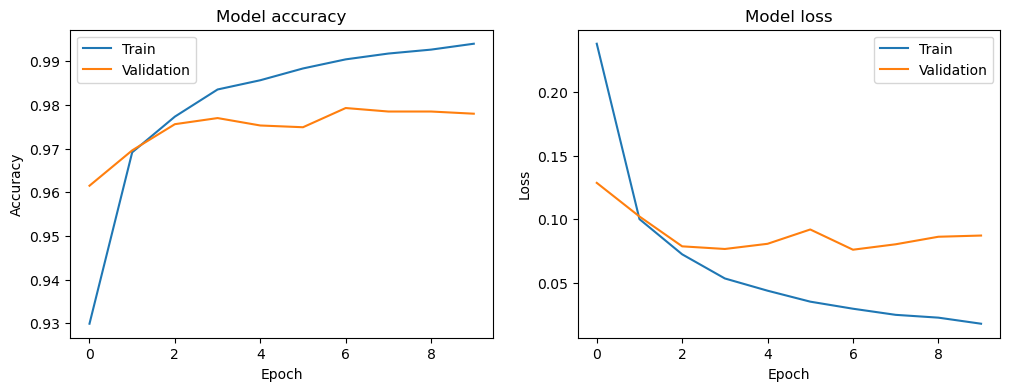

In [15]:
import matplotlib.pyplot as plt
import numpy as np
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')

    plt.show()


plot_training_history(history)




313/313 [==============================] - 0s 881us/step


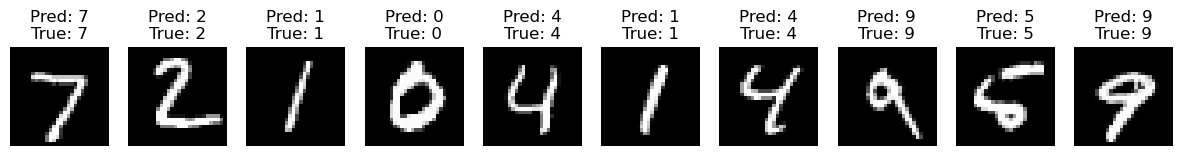

In [12]:
def plot_sample_predictions(model, x_test, y_test, num_samples=10):
    # Predict the probabilities for the test set
    y_pred_prob = model.predict(x_test)
    # Convert probabilities to class labels
    y_pred = np.argmax(y_pred_prob, axis=1)
    y_true = np.argmax(y_test, axis=1)
    

    plt.figure(figsize=(15, 15))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(x_test[i], cmap='gray')
        plt.title(f"Pred: {y_pred[i]}\nTrue: {y_true[i]}")
        plt.axis('off')
    plt.show()


plot_sample_predictions(model, x_test, y_test, num_samples=10)